In [2]:
## examin the data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import datetime

# part of maplotlib
%matplotlib inline

In [3]:
## import newdrivers.cscv
drivers = pd.read_csv(r'C:\Users\galmo\training\azrieli and banav\new_drivers.csv')
drivers.head()

,Unnamed: 0,birthdate,gender,id,vetek
0,0,19.06.1967,F,943,232.0
1,1,"february 13, 1979",M,966,28.0
2,2,19/11/1993,M,250,48.0
3,3,02/02/1961,NaN,156,272.0
4,4,07/03/1965,M,67,130.0


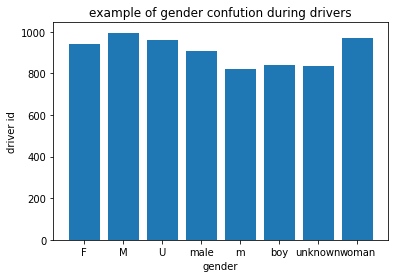

In [4]:
##visualization of drivers
drivers['gender'] = drivers['gender'].fillna('U')
plt.bar(drivers.gender, drivers.id)
plt.title("example of gender confution during drivers")
plt.xlabel("gender")
plt.ylabel("driver id")
plt.show()

In [5]:
##visualization of random trip datasheet
trip = pd.read_csv(r'C:\Users\galmo\training\azrieli and banav\trips_data\april 2015_4781357.csv')
trip.head()

,Unnamed: 0,customer,driver_id,end_time,km,start_time
0,0,aminach,976,2015-04-01 07:24:00,264.455454,2015-04-01 03:31:00
1,1,yes,851,2015-04-01 19:08:00,415.772558,2015-04-01 13:10:00
2,2,osem,626,2015-04-02 03:02:00,140.447201,2015-04-02 00:50:00
3,3,intel,186,2015-04-02 22:32:00,520.465430,2015-04-02 15:54:00
4,4,intel,430,2015-04-03 06:19:00,209.639043,2015-04-03 02:57:00


In [6]:
##type of km
trip.km.dtype

dtype('float64')

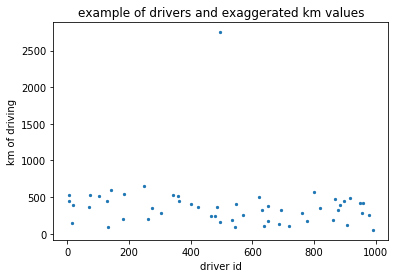

In [7]:
##km which are strange
trip1 = pd.read_csv(r'C:\Users\galmo\training\azrieli and banav\trips_data\april 2015_4781363.csv')
trip1.head()
plt.scatter(trip1.driver_id, trip1.km, s= 5)
plt.title("example of drivers and exaggerated km values")
plt.xlabel("driver id")
plt.ylabel("km of driving")
plt.show()

In [8]:
##arranging the taarif.csv
taarif = pd.read_csv(r'C:\Users\galmo\training\azrieli and banav\taarif.csv')
taarif.head()
## delete an empty first row
taarif = taarif.drop(labels=0, axis=0)
## changing huge values
taarif['weekend_bonus'] = taarif['weekend_bonus'].replace([500,70000],([50,70]))
taarif['basic_taarif']= taarif['basic_taarif'].fillna(5)
## insert bituach_leumi and zero nun data
taarif.fillna(0)
taarif



,customer,basic_taarif,extra_milage,night_bonus,weekend_bonus
1,jerusalem_muni,8.0,40.0,50.0,30.0
2,intel,8.0,6.0,20.0,0.0
3,mizranei_kfar_saba,15.0,4.0,0.0,25.0
4,dbs,10.0,8.0,0.0,25.0
5,tnuva,6.0,3.0,80.0,0.0
6,angel,1.0,5.0,100.0,0.0
7,telecommunication_ltd,7.0,7.0,10.0,40.0
8,osem,12.0,4.0,20.0,0.0
9,iaf,20.0,10.0,200.0,50.0
10,tara,6.0,6.0,50.0,30.0


In [9]:
MALE_NAMES = ['male','m','boy']
UKNOWN_NAMES = ['null','unknown','Nan','none']
ISHOT = ['woman', 'girl']

def reformat_new_drivers(path_to_ndriver):
    ## arranging new_drivers
    ndriver = pd.read_csv(path_to_ndriver)
    ## delete first column
    ndriver = ndriver.drop(ndriver.columns[0], axis=1)
    ndriver
    ## normalization of gender
    ndriver['gender'] = ndriver['gender'].replace(MALE_NAMES, 'M')
    ndriver['gender'] = ndriver['gender'].replace(UKNOWN_NAMES, 'U')
    ndriver['gender'] = ndriver['gender'].replace(ISHOT, 'F')
    ndriver['gender'] = ndriver['gender'].fillna('U')
    ##normalization of birthdate
    ndriver['birthdate'] = pd.to_datetime(ndriver['birthdate'])
    ##normalization of vetek
    ndriver['vetek']=(ndriver['vetek']/12)
    return ndriver

reformat_new_drivers(r'C:\Users\galmo\training\azrieli and banav\new_drivers.csv')

,birthdate,gender,id,vetek
0,1967-06-19,F,943,19.333333
1,1979-02-13,M,966,2.333333
2,1993-11-19,M,250,4.000000
3,1961-02-02,U,156,22.666667
4,1965-07-03,M,67,10.833333
...,...,...,...,...
95,1990-08-16,M,798,12.000000
96,1967-05-06,M,865,8.583333
97,1972-02-10,M,399,26.000000
98,1979-03-16,M,509,14.333333


In [10]:
## checking drivers with kviut
kvua = pd.read_csv(r'C:\Users\galmo\training\azrieli and banav\Drivers_with_kviut.csv')
kvua.info
kvua.id.unique()
kvua.info
kvua.head()
## normalization of gender
kvua['gender'] = kvua['gender'].replace(MALE_NAMES , 'M')
kvua['gender'] = kvua['gender'].replace(UKNOWN_NAMES, 'U')
kvua['gender'] = kvua['gender'].replace(ISHOT, 'F')
## deleting first columns
kvua = kvua.drop(kvua.columns[0], axis=1)
##normalization of birthdate
kvua['birthdate'] = pd.to_datetime(kvua['birthdate'])
kvua

,birthdate,gender,id,vetek
0,1964-05-27,M,502,7.9
1,1983-10-07,M,81,14.4
2,1992-10-15,M,814,18.7
3,1990-07-18,M,666,8.7
4,1969-10-04,M,205,9.9
...,...,...,...,...
895,1960-04-01,M,119,15.4
896,1983-12-08,M,236,6.7
897,1987-06-13,M,449,18.7
898,1977-02-21,M,494,7.9


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000203347A8608>]],
      dtype=object)

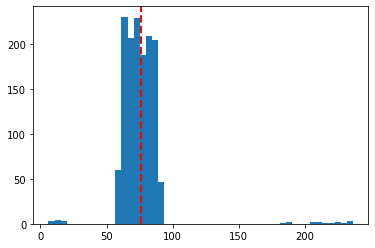

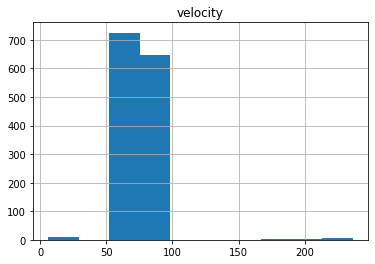

In [18]:
## importing all of the trip dataframes
import os 
import pandas as pd
from datetime import datetime, timedelta, date, time
import glob


## Set the directory path where the dataframes are located
directory_path = r"C:\Users\galmo\training\azrieli and banav\velocity"
############
filenames = glob.glob(directory_path+r"\*.csv")
############
os.listdir(directory_path)

## Initialize an empty list to store the dataframes
df_list = []

## Loop through each file in the directory and append its dataframe to the list
for filename in os.listdir(directory_path):
    if filename.endswith(').csv'):
        continue
    if filename.endswith('.csv'):
        filepath = os.path.join(directory_path, filename)
        df = pd.read_csv(filepath)
        df_list.append(df)

## fill in a non end_time culomns
def complete_hours(distance, start_time):
    start_time = datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S')
    v=120
    duration= distance/v
    time_delta = timedelta(days=duration)
    end_time = start_time + time_delta
    return str(end_time)

## Concatenate all the dataframes in the list into a single dataframe
combined_df = pd.concat(df_list, ignore_index=True)
                        
## arrange the dataframe endtime
combined_df['end_time'] = pd.to_datetime(combined_df['end_time'])
combined_df['start_time'] = pd.to_datetime(combined_df['start_time'])
combined_df['start_time'] = pd.to_datetime(combined_df['start_time'])
combined_df['end_time'] = pd.to_datetime(combined_df['end_time'])
combined_df['duration per km']= combined_df['km']/120

## Calculate time delta
combined_df['time_delta'] = combined_df['end_time'] - combined_df['start_time']
combined_df['time_delta_hours'] = combined_df['time_delta'] / pd.Timedelta(hours=1)
combined_df['new_end_time'] = combined_df.apply(lambda x: x['start_time'] + timedelta(hours=x['duration per km']), axis=1)
combined_df['end_time'] = combined_df['end_time'].fillna(combined_df['new_end_time'])


## change values of yes and hot
combined_df['customer'] = combined_df['customer'].replace(['yes'], 'dbs')
combined_df['customer'] = combined_df['customer'].replace(['hot'], 'telecommunication_ltd')
combined_df['start_time'] = pd.to_datetime(combined_df['start_time'])
kvua['birthdate'] = pd.to_datetime(kvua['birthdate'])

## add an age column
merged_df = pd.merge(combined_df, kvua, left_on='driver_id', right_on='id')
merged_df['Age'] = merged_df['start_time']-merged_df['birthdate']
merged_df['Age'] = round(merged_df['Age'] / pd.Timedelta(weeks=52))

## taarif per customer table
customer_taarif = pd.merge(merged_df, taarif, left_on='customer', right_on='customer')

## velocity
def velocity(km , time_delta)-> int:
    """
    calculating every velocity of every drive
    """
    velocity = km/time_delta
    return velocity

customer_taarif['velocity'] = customer_taarif.apply(lambda x: velocity(x['km'], x['time_delta_hours']), axis = 1)
                                    
avg = np.mean(customer_taarif['velocity'])
plt.hist(customer_taarif['velocity'], bins=50)
plt.axvline(avg, color='red', linestyle='dashed', linewidth=2)

customer_taarif. hist(column='velocity', by=None, grid=True, xlabelsize=None, ylabelsize=None)
